# Animal Example

This is a notebook to demonstrate how we apply the GameArg approach to reason animal example from paper "Representation of Case Law as an Argumentation Framework" by Dr.T.J.M. Bench-Capon

### Import Package

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from lib.GameArg import *
from IPython.display import Image

## Graph Input

**Start from Win_Move Graph**

the following graph has to be a **win_move** graph, if you input a argumentation graph, please source node and target node first

In [2]:
%%file files/plain_wm_graph.dlv
edge(a,b).
edge(t,b).
edge(b,c).
edge(c,d).
edge(b,e).
edge(d,e).
edge(b,f).
edge(s,g).
edge(f,h).
edge(e,i).
edge(i,j).
edge(i,k).
edge(i,l).
edge(e,m).
edge(o,m).
edge(n,m).
edge(j,n).
edge(i,o).
edge(m,o).
edge(g,q).
edge(h,q).
edge(c,q).
edge(e,s).
edge(f,s).
edge(s,t).
edge(t,u).
edge(b,v).
edge(u,v).
edge(b,w).
edge(d,x).
edge(b,y).
edge(c,z).

Overwriting files/plain_wm_graph.dlv


**Start from Attack Graph**

if you have the **attack graph** like below, you can run the following to generate the plain_wm_graph.dlv

In [3]:
# %%file files/plain_atk_graph.dlv
# edge(c,a).
# edge(l,k).
# edge(d,c).
# edge(e,c).
# edge(e,l).
# edge(m,l).
# edge(e,d).
# edge(d,e).
# edge(m,e).
# edge(e,m).
# edge(f,d).
# edge(g,d).
# edge(d,g).
# edge(h,e).
# edge(n,m).
# edge(m,n).

In [4]:
# input_file_path = "files/plain_atk_graph.dlv"
# output_file_path = "files/plain_wm_graph.dlv"
# reverse_edges(input_file_path, output_file_path)

## Graph Generation

**Win-Move Graph**

In [5]:
create_plain_graph("files/plain_wm_graph.dlv", "edge", "graphs/wm_graph.dot")

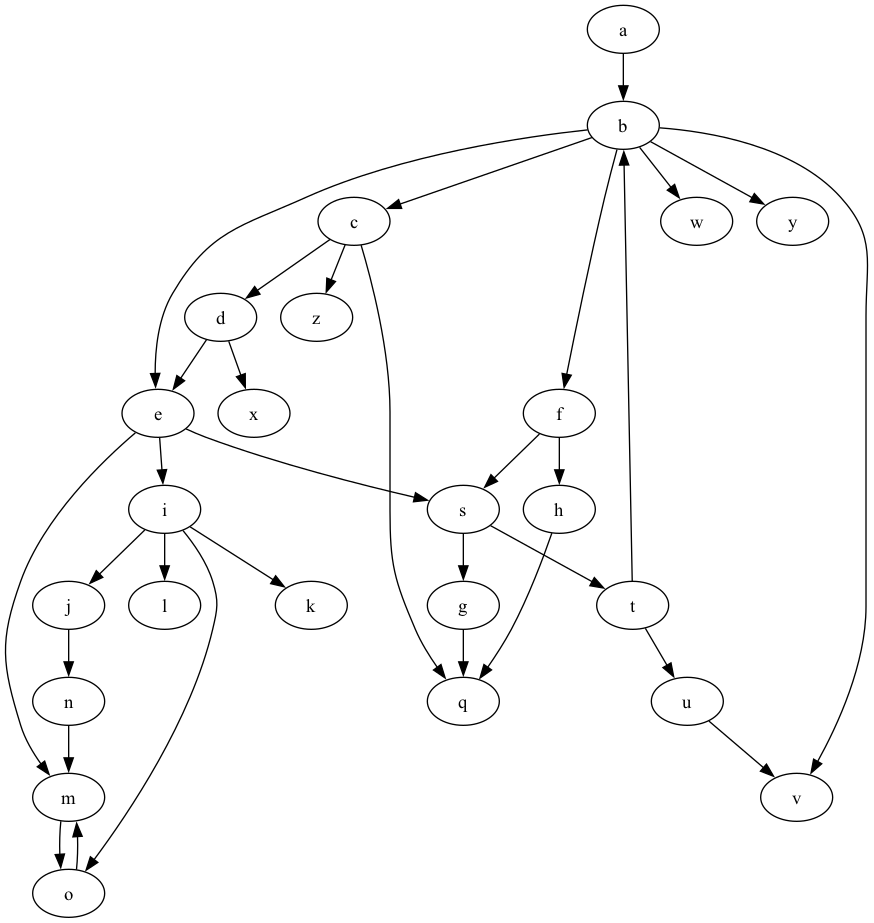

In [6]:
render_dot_to_png("graphs/wm_graph.dot", "graphs/wm_graph.png")
Image("graphs/wm_graph.png")

**Attack_Graph**

In [7]:
create_plain_graph(
    "files/plain_wm_graph.dlv", "edge", "graphs/attack_graph.dot", arg=True
)

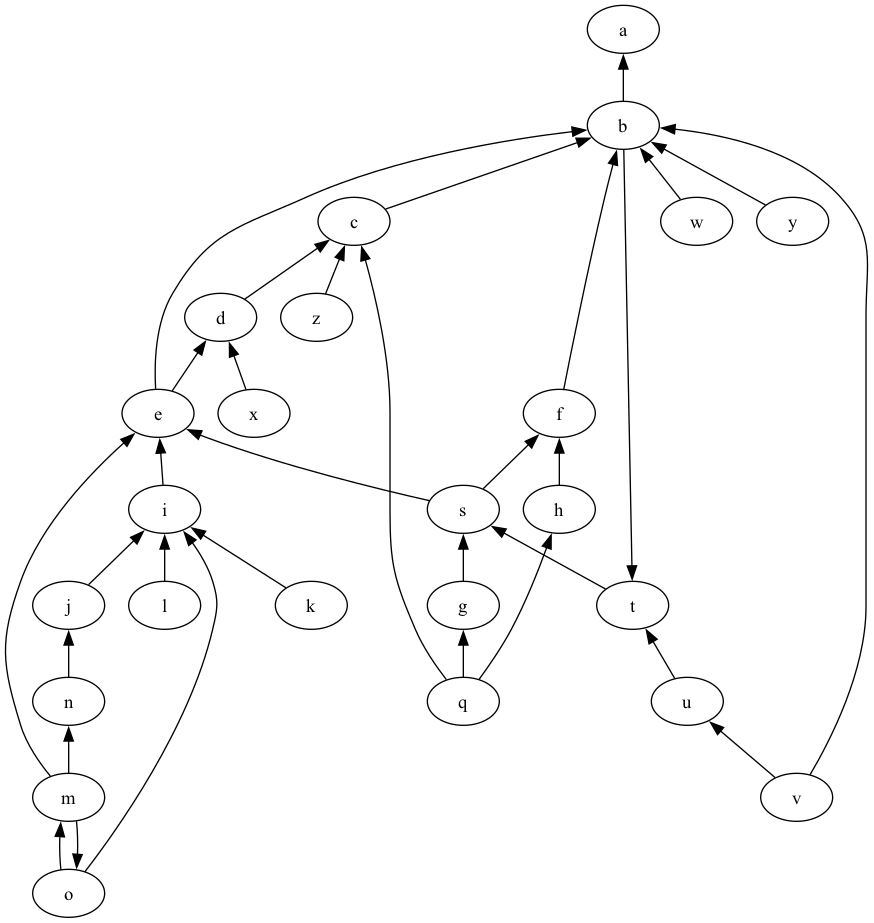

In [8]:
render_dot_to_png("graphs/attack_graph.dot", "graphs/attack_graph.png")
Image("graphs/attack_graph.png")

## Graph Coloring : Well-Founded Semantics

Here we will use the kernel as an example to help you better understand the tool

### Step by Step

#### Get Node Status

To standardize the process of calculation, we use `e` instead of `edge` therefore for wm graph `e(X,Y) :- edge(X,Y).`

In [9]:
%%file files/plain_to_wm.dlv

e(X,Y):- edge(Y,X).

Writing files/plain_to_wm.dlv


Later we define the Win-Move Calculation

In [10]:
%%file files/cal_wm.dlv

% Positions
pos(X) :- e(X,_).
pos(X) :- e(_,X).

% Kernel rules
win(X) :- e(Y,X), lost(Y).         % X is in the kernel complement if there is an edge from X into the kernel (to Y)
lost(X) :- pos(X), not win(X).
drawn(X) :- pos(X), not win(X), not lost(X).

Writing files/cal_wm.dlv


`-wf` indicates that the dlv will use well-founded semantics

In [11]:
cmd_solve = "dlv files/plain_wm_graph.dlv files/plain_to_wm.dlv files/cal_wm.dlv -wf"

let's run it with DLV, we will get the following output

In [12]:
run_command(cmd_solve)

'DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]\n\nTrue: {edge(a,b), edge(b,c), edge(b,e), edge(b,f), edge(b,v), edge(b,w), edge(b,y), edge(t,b), edge(t,u), edge(c,d), edge(c,q), edge(c,z), edge(d,e), edge(d,x), edge(e,s), edge(e,i), edge(e,m), edge(f,s), edge(f,h), edge(s,t), edge(s,g), edge(g,q), edge(h,q), edge(i,j), edge(i,k), edge(i,l), edge(i,o), edge(j,n), edge(m,o), edge(o,m), edge(n,m), edge(u,v), e(b,a), e(b,t), e(t,s), e(c,b), e(d,c), e(e,b), e(e,d), e(f,b), e(s,e), e(s,f), e(g,s), e(h,f), e(i,e), e(j,i), e(k,i), e(l,i), e(m,e), e(m,o), e(m,n), e(o,i), e(o,m), e(n,j), e(q,c), e(q,g), e(q,h), e(u,t), e(v,b), e(v,u), e(w,b), e(x,d), e(y,b), e(z,c), pos(a), pos(b), pos(t), pos(c), pos(d), pos(e), pos(f), pos(s), pos(g), pos(h), pos(i), pos(j), pos(k), pos(l), pos(m), pos(o), pos(n), pos(q), pos(u), pos(v), pos(w), pos(x), pos(y), pos(z), lost(a), win(b), lost(t), win(c), win(d), lost(f), win(s), win(g), win(h), win(i), lost(k), lost(l), lost(q), win(u),

however, we need to filterout unnecessary information

In [13]:
wm_nodes_status = get_nodes_status(
    run_command(cmd_solve), node_types=["win", "lost", "drawn"]
)

thus we know the status of each nodes, which we will use for further coloring the graph

In [14]:
wm_nodes_status

{'win': ['b', 'c', 'd', 's', 'g', 'h', 'i', 'u'],
 'lost': ['a', 't', 'f', 'k', 'l', 'q', 'v', 'w', 'x', 'y', 'z'],
 'drawn': ['e', 'j', 'm', 'o', 'n']}

#### Visualization Schema

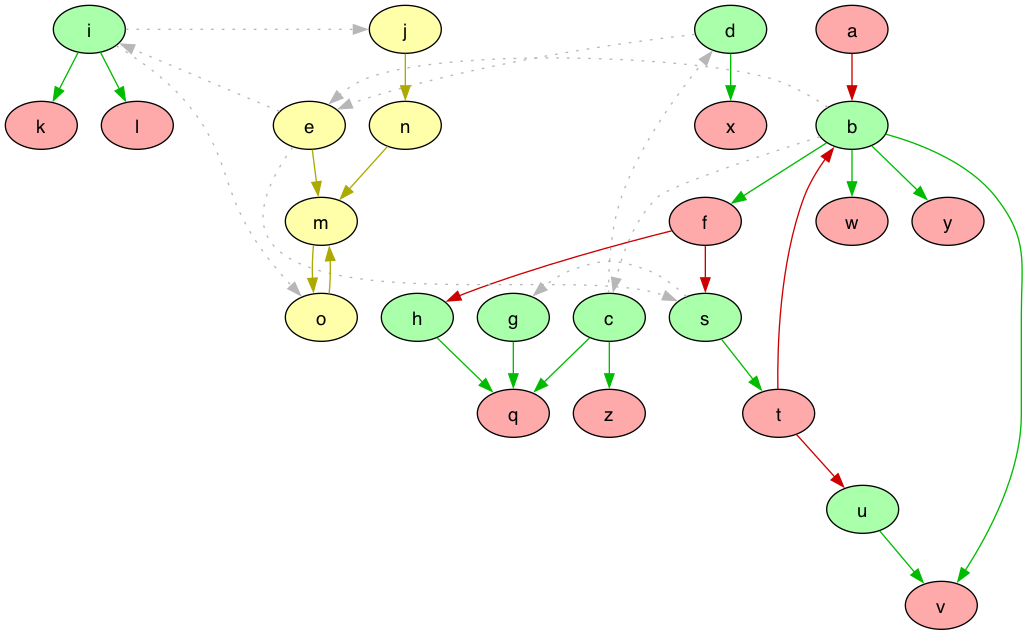

In [15]:
wm_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
wm_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
apply_color_schema(
    "graphs/wm_graph.dot",
    "wm",
    wm_nodes_status,
    wm_node_color_wfs,
    wm_edge_color_wfs,
)
Image("graphs/wm_graph_colored.png")

### One Function for All

As we have win_move graph and attack graph, we start to think about maybe we only need to provide the visualization schema and one function can provide us the expected graph

**WM game**

We will unveil the `visualize_wfs` function to illustrate well-founded semantics, requiring the specification of three values along with their color coding. Conversely, for stable models, the `visualize_stb` function requires just two values to be provided.

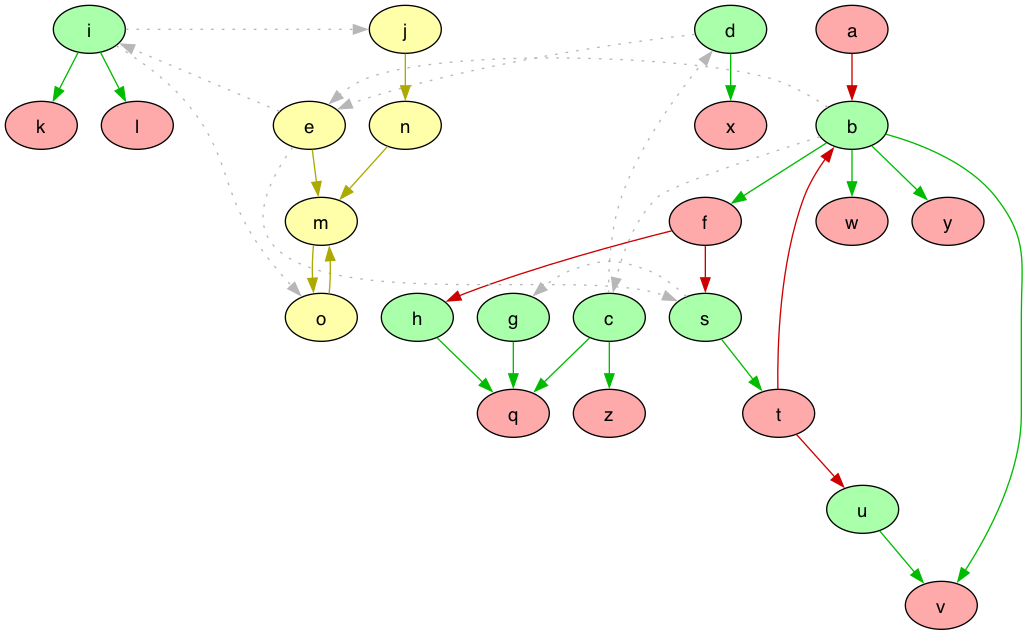

In [16]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs
)
Image("graphs/game_graph_colored.png")

Having chosen the color for the edges, you are now able to display either the node label or the edge label.

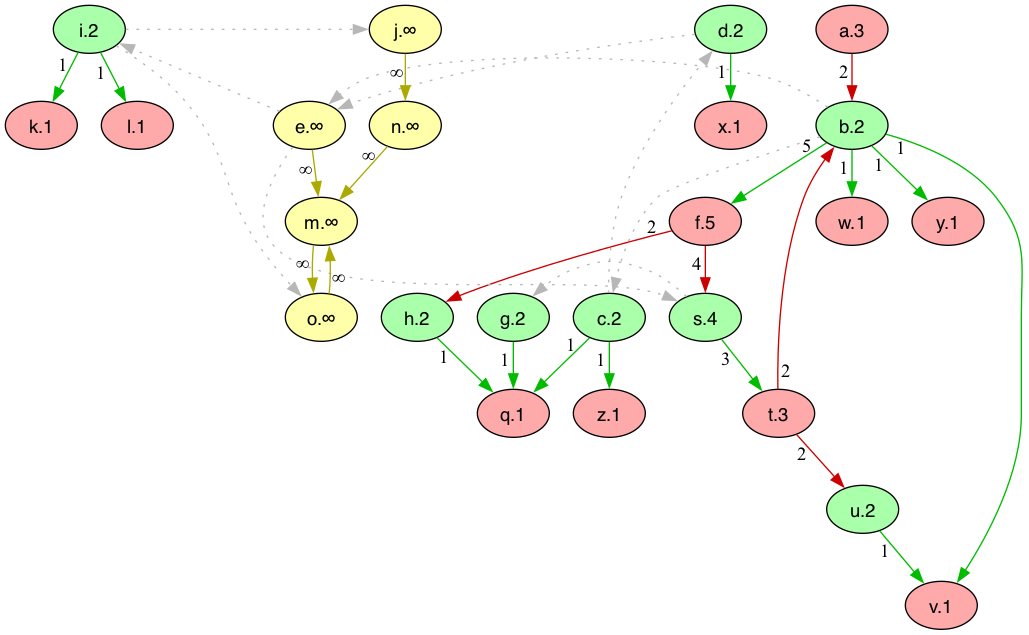

In [17]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
)
Image("graphs/game_graph_colored.png")

You can also add more layout to the graph

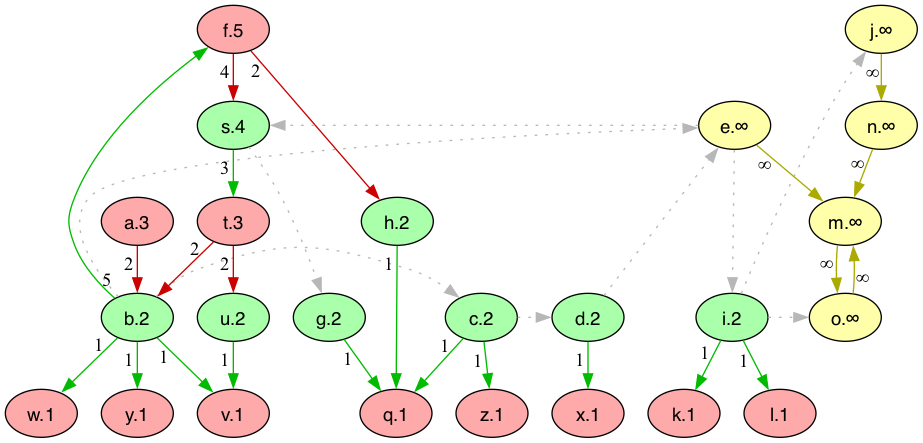

In [18]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/game_graph_colored.png")

**Argumentation**

From the game graph, by adding `arg=True`, you can effortlessly obtain the argumentation framework version.

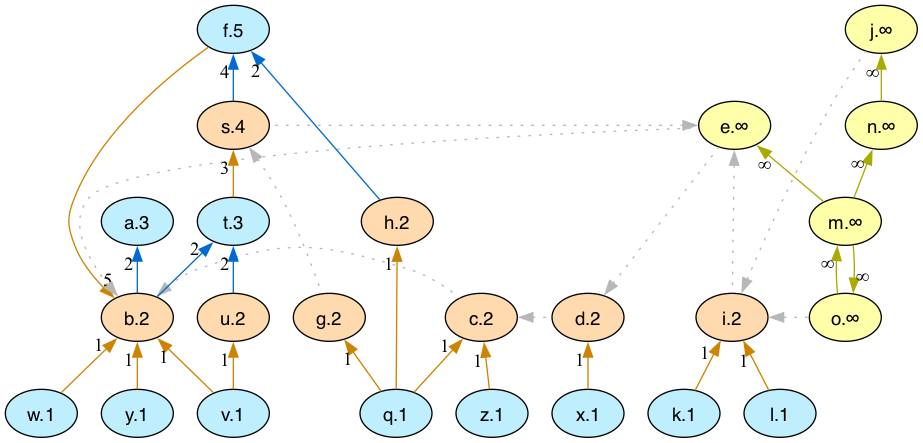

In [19]:
arg_node_color_wfs = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_wfs = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_wfs,
    arg_edge_color_wfs,
    arg=True,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/arg_graph_colored.png")

**Kernel and Graph Decomposition**

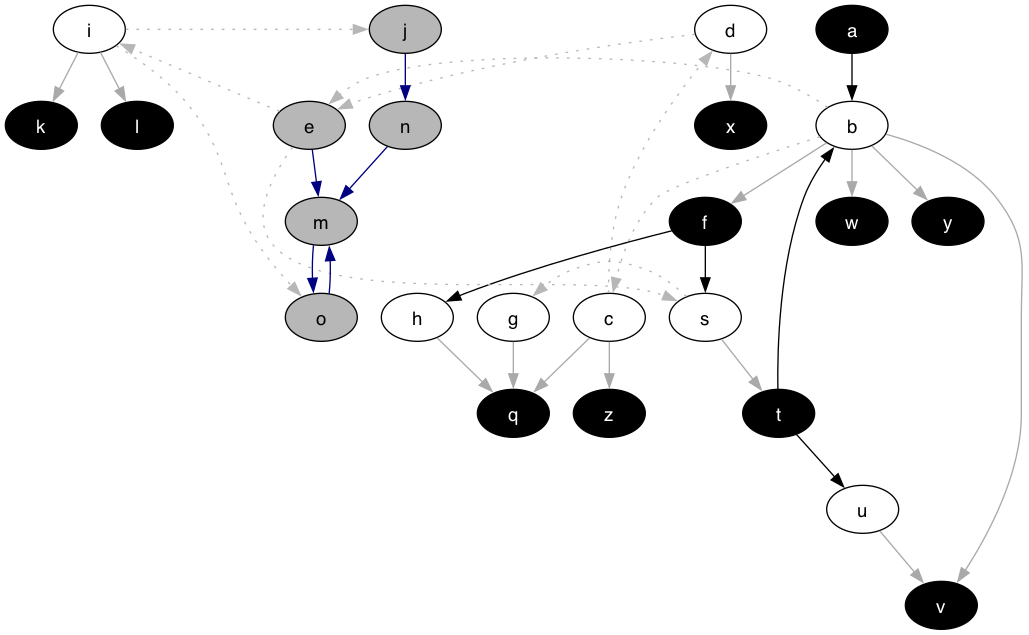

In [20]:
kernel_node_color_wfs = {"c": "white", "k": "black", "pk": "gray"}
kernel_edge_color_wfs = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_blue",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_wfs,
    kernel_edge_color_wfs
)
Image("graphs/kernel_graph_colored.png")

### Graph Coloring: Stable Models

#### Get Node Status

similar to the WFS, but we need to remove the solve part `-wf`

In [21]:
cmd_solve = 'dlv files/plain_wm_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -filter="k"'

let's run the command

In [22]:
print(run_command(cmd_solve))

DLV [build BEN/Dec 17 2012   gcc 4.2.1 (Apple Inc. build 5666) (dot 3)]

{k(a), k(t), k(f), k(j), k(k), k(l), k(m), k(q), k(v), k(w), k(x), k(y), k(z)}

{k(a), k(t), k(e), k(f), k(k), k(l), k(o), k(n), k(q), k(v), k(w), k(x), k(y), k(z)}



After the command, we can get the possible worlds

#### One Function for All

Similar to the WFS, we also want to generate all the stable models with defined visualization schema

**Stable Models for Kernel Graph**

In [23]:
kernel_node_color_stb = {"c": "white", "k": "black"}
kernel_edge_color_stb = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_yellow",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_stb,
    kernel_edge_color_stb,
    show_node_label=True,
    rank=True
)

**Stable Models for WM Graph**

In [24]:
game_node_color_stb = {"win": "green", "lost": "red"}
game_edge_color_stb = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_stb,
    game_edge_color_stb,
    show_node_label=True,
    rank=True
)

**Stable Models for Attack Graph**

In [25]:
arg_node_color_stb = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_stb = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_stb,
    arg_edge_color_stb,
    arg=True,
    show_node_label=True,
    rank=True
)